In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Loading and cleaning the dataset

In [2]:
movies_df = pd.read_csv('/content/tmdb_5000_movies.csv', engine="python")
movies_df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800.0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,9.610000e+08,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500.0


In [3]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2435 entries, 0 to 2434
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                2435 non-null   int64  
 1   genres                2435 non-null   object 
 2   homepage              1009 non-null   object 
 3   id                    2435 non-null   int64  
 4   keywords              2435 non-null   object 
 5   original_language     2435 non-null   object 
 6   original_title        2435 non-null   object 
 7   overview              2435 non-null   object 
 8   popularity            2435 non-null   float64
 9   production_companies  2435 non-null   object 
 10  production_countries  2435 non-null   object 
 11  release_date          2434 non-null   object 
 12  revenue               2434 non-null   float64
 13  runtime               2434 non-null   float64
 14  spoken_languages      2434 non-null   object 
 15  status               

In [4]:
movies_df.describe().T

,count,mean,std,min,25%,50%,75%,max
budget,2435.0,5.254422e+07,4.593765e+07,0.000000,2.400000e+07,4.000000e+07,7.000000e+07,3.800000e+08
id,2435.0,4.445521e+04,7.512878e+04,12.000000,6.439500e+03,1.111300e+04,4.376200e+04,4.178590e+05
popularity,2435.0,3.138808e+01,3.956886e+01,0.068228,1.163424e+01,2.200141e+01,3.988654e+01,8.755813e+02
revenue,2434.0,1.433724e+08,2.055057e+08,0.000000,1.994302e+07,7.370537e+07,1.758958e+08,2.787965e+09
runtime,2434.0,1.123706e+02,2.129489e+01,0.000000,9.800000e+01,1.090000e+02,1.230000e+02,3.380000e+02
vote_average,2434.0,6.167379e+00,8.707160e-01,0.000000,5.700000e+00,6.200000e+00,6.700000e+00,9.300000e+00
vote_count,2434.0,1.087672e+03,1.533436e+03,0.000000,2.050000e+02,5.150000e+02,1.302500e+03,1.375200e+04


In [5]:
# return the number of duplicated data
movies_df.duplicated().sum()

0

In [6]:
movies_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [60]:
# extracting useful columns
df = movies_df[ ['original_title', 'release_date', 'production_companies', 'production_countries', 'budget', 'genres', 'original_language', 'runtime', 'popularity', 'status', 'vote_count', 'vote_average', 'revenue'] ]
df.head(2)

,original_title,release_date,production_companies,production_countries,budget,genres,original_language,runtime,popularity,status,vote_count,vote_average,revenue
0,Avatar,2009-12-10,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,162.0,150.437577,Released,11800.0,7.2,2.787965e+09
1,Pirates of the Caribbean: At World's End,2007-05-19,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,169.0,139.082615,Released,4500.0,6.9,9.610000e+08


In [73]:
# replacing json values with list of names for each column
import json


def parse_json(json_string):
    try:
      json_obj = json.loads(json_string)
      if isinstance(json_obj, list):
        return [item['name'] for item in json_obj]
      else:
        return None
    except json.JSONDecodeError as err:
      print(err)
      return None


def extract_names(data, columns):
  for column in columns:
    data[column] = data[column].apply(parse_json)
  return data


df = extract_names(df, ['production_companies', 'production_countries', 'genres'])
df.head(3)

<ipython-input-73-ce5f5feb3dca>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].apply(parse_json)


,original_title,release_date,production_companies,production_countries,budget,genres,original_language,runtime,popularity,status,vote_count,vote_average,revenue
0,Avatar,2009-12-10,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",237000000,"[Action, Adventure, Fantasy, Science Fiction]",en,162.0,150.437577,Released,11800.0,7.2,2.787965e+09
1,Pirates of the Caribbean: At World's End,2007-05-19,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],300000000,"[Adventure, Fantasy, Action]",en,169.0,139.082615,Released,4500.0,6.9,9.610000e+08
2,Spectre,2015-10-26,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",245000000,"[Action, Adventure, Crime]",en,148.0,107.376788,Released,4466.0,6.3,8.806746e+08


# Exploratory Data Analysis

In [9]:
# sum of all the profit gained from movies
print('sum of all the revenue gained from movies: ', df['revenue'].sum())
print('sum of all the budget spent on movies: ', df['budget'].sum())
print('profit of movies: ', df['revenue'].sum() - df['budget'].sum())

sum of all the revenue gained from movies:  348968539909.0
sum of all the budget spent on movies:  127945178092
profit of movies:  221023361817.0


In [10]:
df['year'] = pd.DatetimeIndex(df['release_date']).year
df.head(2)

<ipython-input-10-dc5212f19e80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = pd.DatetimeIndex(df['release_date']).year


,original_title,release_date,production_companies,production_countries,budget,genres,original_language,runtime,popularity,status,vote_count,vote_average,revenue,year
0,Avatar,2009-12-10,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,162.0,150.437577,Released,11800.0,7.2,2.787965e+09,2009.0
1,Pirates of the Caribbean: At World's End,2007-05-19,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,169.0,139.082615,Released,4500.0,6.9,9.610000e+08,2007.0


In [11]:
# sns constants
colors = sns.color_palette("husl", 10)

<Axes: xlabel='year', ylabel='yearly_revenue'>

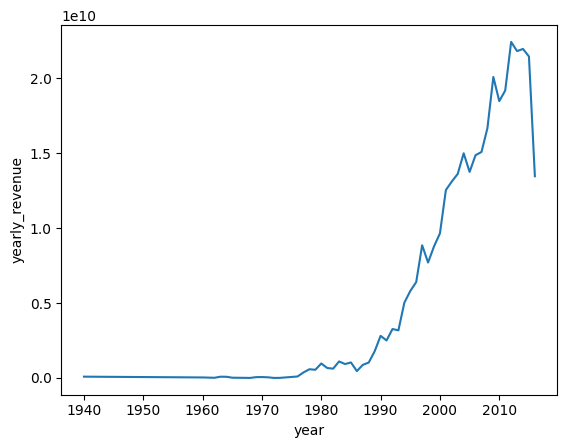

In [12]:
# profit from all movies for each year
yearly_revenue = df.groupby(['year'])['revenue'].sum().reset_index(name='yearly_revenue')
sns.lineplot(x='year', y='yearly_revenue', data = yearly_revenue)

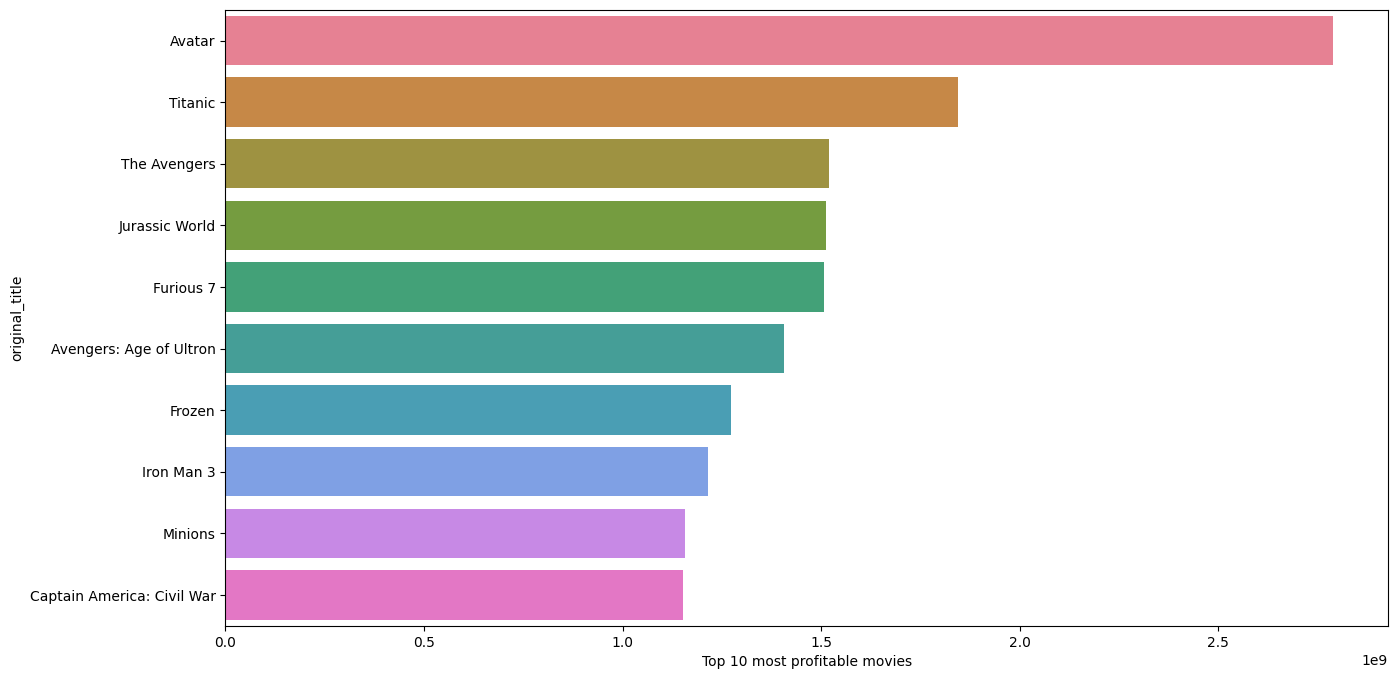

In [13]:
# top 10 most profitable movies
plt.figure(figsize=(15,8))
data = df.sort_values('revenue', ascending=False)[:10]
sns.barplot(x = 'revenue', y ='original_title', data=data, orient="h", palette=colors, hue='original_title')
plt.xlabel("Top 10 most profitable movies")
plt.show()

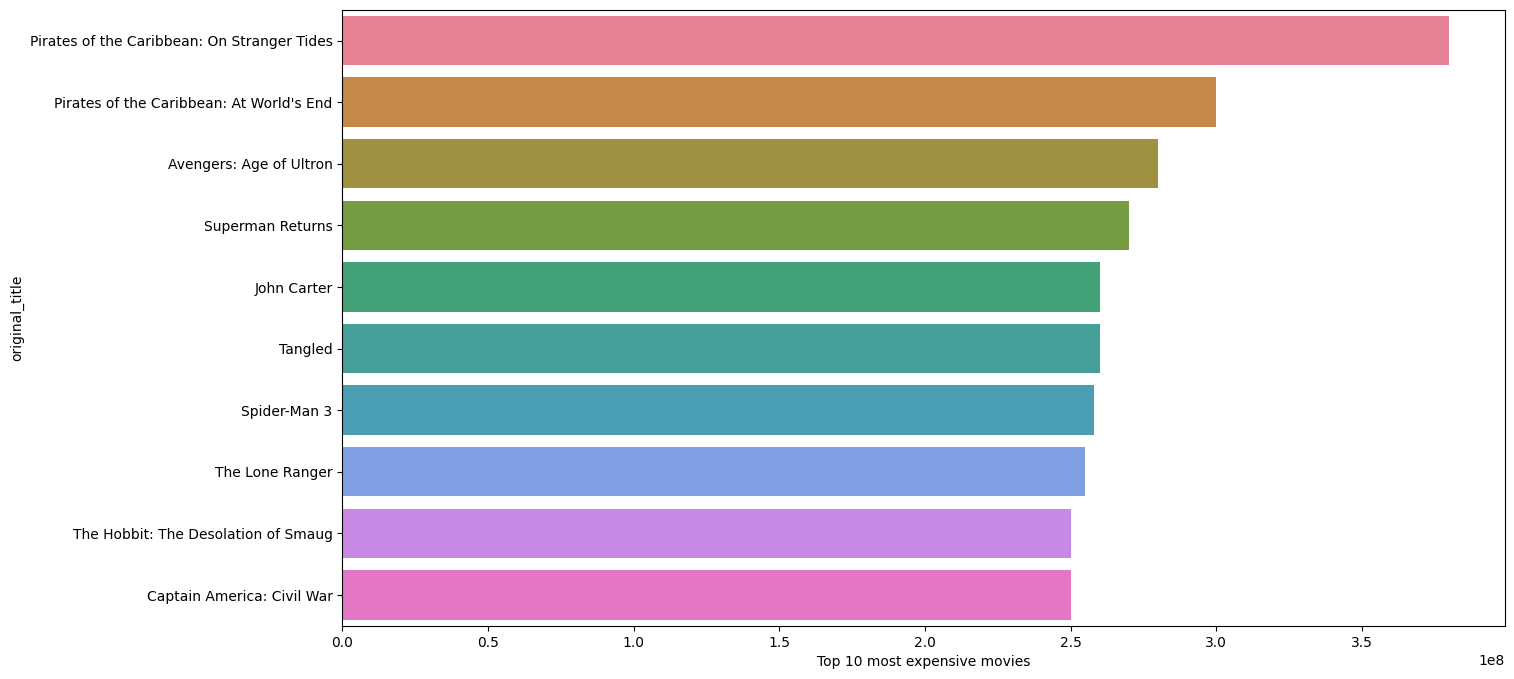

In [14]:
# top 10 most expensive movies
plt.figure(figsize=(15,8))
data = df.sort_values('budget', ascending=False)[:10]
sns.barplot(x = 'budget', y = 'original_title', data=data, palette=colors, orient="h", hue='original_title')
plt.xlabel("Top 10 most expensive movies")
plt.show()

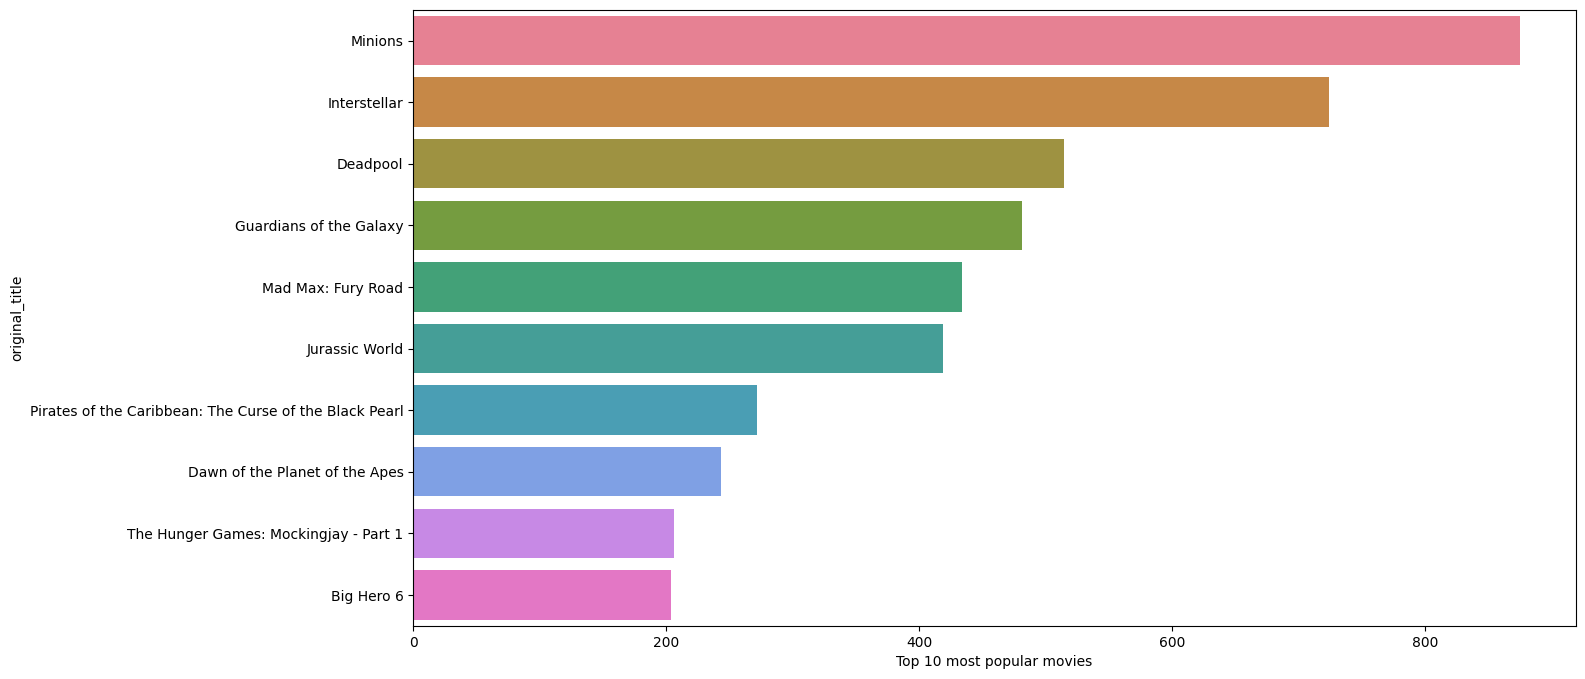

In [15]:
# top 10 most popular movies
plt.figure(figsize=(15,8))
data = df.sort_values('popularity', ascending=False)[:10]
sns.barplot(x = 'popularity', y = 'original_title', data=data, palette=colors, orient="h", hue='original_title')
plt.xlabel("Top 10 most popular movies")
plt.show()

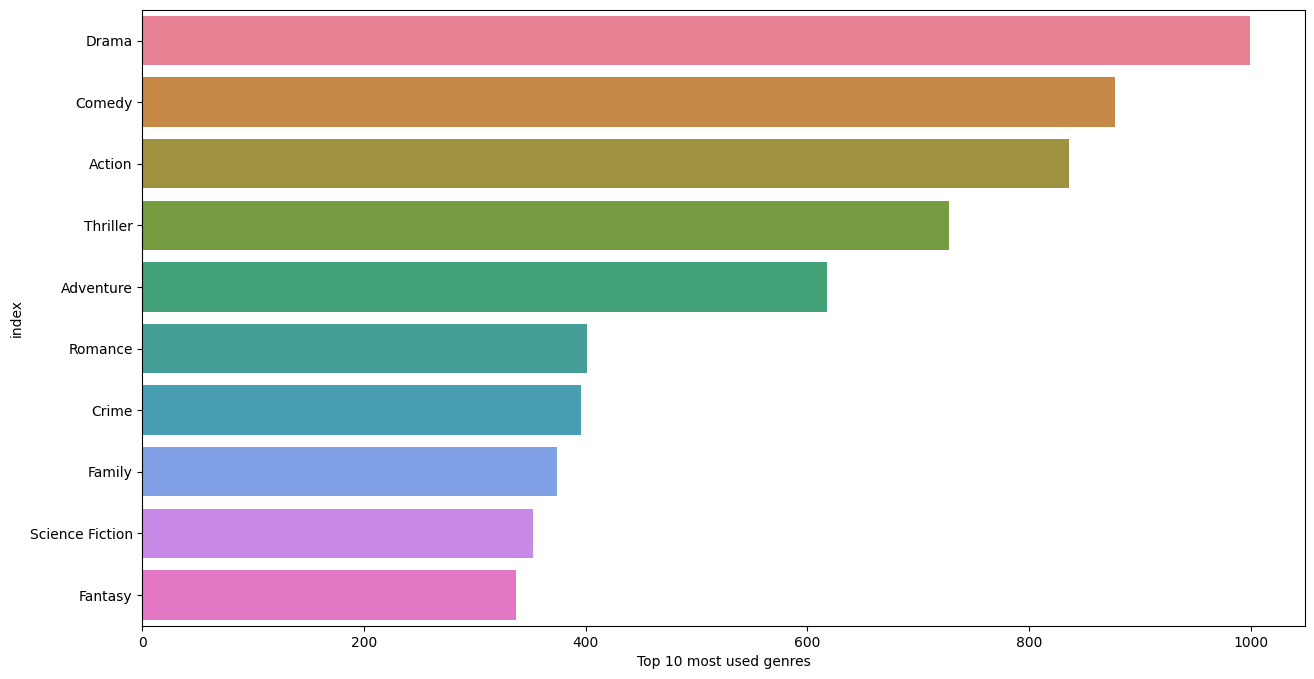

In [83]:
# generes
genre_count = df['genres'].explode().dropna().value_counts().reset_index(name='count')
# genre_count
plt.figure(figsize=(15,8))
data = genre_count.sort_values('count', ascending=False)[:10]
sns.barplot(x = 'count', y = 'index', data=data, palette=colors, orient="h", hue='index')
plt.xlabel("Top 10 most used genres")
plt.show()